In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv(
    r'cumulative_2025.10.04_11.08.18.csv',
    sep=None,            # auto-detect delimiter
    engine='python',     # use the Python engine for flexibility
    # on_bad_lines='skip'  # skip malformed lines
    skiprows=53
)

# Check first few rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'cumulative_2025.10.04_11.08.18.csv'

In [ ]:
df.columns = df.columns.str.strip()
target = 'koi_disposition'

features = [
    'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec',
    'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk',
    'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1',
    'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad',
    'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_insol',
    'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
    'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
    'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
    'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'
]

cols_to_use = [col for col in features + [target] if col in df.columns]
df_model = df[cols_to_use].copy()
df_model = df_model.dropna()

le = LabelEncoder()
df_model['label'] = le.fit_transform(df_model[target])
df_model = pd.get_dummies(df_model, columns=['koi_tce_delivname'])

In [ ]:
y = df_model['label']
X = df_model.drop(columns=[target, 'label'])

X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42, stratify=y_trainval
)

In [ ]:
# Example hyperparameter values to test
n_estimators_list = [50, 100, 108, 200, 300]
# n_estimators_list = list(range(50, 1000))
max_depth_list = [None, 5, 10, 20]

best_acc = 0
best_params = {}   

for n in n_estimators_list:
    for d in max_depth_list:
        clf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_val_pred = clf.predict(X_val)
        acc = accuracy_score(y_val, y_val_pred)
        print(f"n_estimators={n}, max_depth={d} -> Validation Accuracy: {acc:.4f}")
        
        # Track best parameters
        if acc > best_acc:
            best_acc = acc
            best_params = {'n_estimators': n, 'max_depth': d}

print("Best Validation Accuracy:", best_acc)
print("Best Hyperparameters:", best_params)


n_estimators=50, max_depth=None -> Validation Accuracy: 0.9165
n_estimators=50, max_depth=5 -> Validation Accuracy: 0.8828
n_estimators=50, max_depth=10 -> Validation Accuracy: 0.9125
n_estimators=50, max_depth=20 -> Validation Accuracy: 0.9194
n_estimators=100, max_depth=None -> Validation Accuracy: 0.9160
n_estimators=100, max_depth=5 -> Validation Accuracy: 0.8794
n_estimators=100, max_depth=10 -> Validation Accuracy: 0.9119
n_estimators=100, max_depth=20 -> Validation Accuracy: 0.9148
n_estimators=108, max_depth=None -> Validation Accuracy: 0.9182
n_estimators=108, max_depth=5 -> Validation Accuracy: 0.8794
n_estimators=108, max_depth=10 -> Validation Accuracy: 0.9137
n_estimators=108, max_depth=20 -> Validation Accuracy: 0.9165
n_estimators=200, max_depth=None -> Validation Accuracy: 0.9205
n_estimators=200, max_depth=5 -> Validation Accuracy: 0.8799
n_estimators=200, max_depth=10 -> Validation Accuracy: 0.9125
n_estimators=200, max_depth=20 -> Validation Accuracy: 0.9154
n_estima

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       362
           1       0.89      0.88      0.89       544
           2       0.97      1.00      0.98       843

    accuracy                           0.92      1749
   macro avg       0.90      0.90      0.90      1749
weighted avg       0.92      0.92      0.92      1749



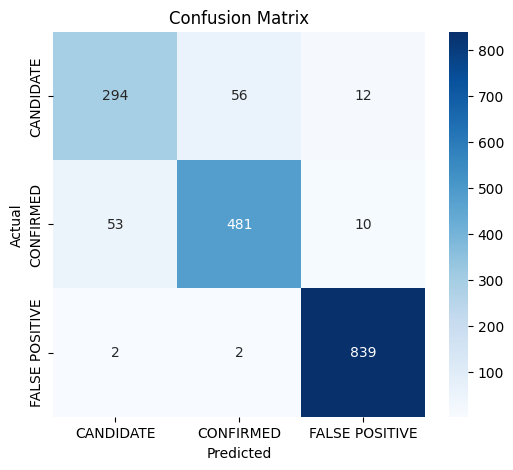

In [ ]:
y_test_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


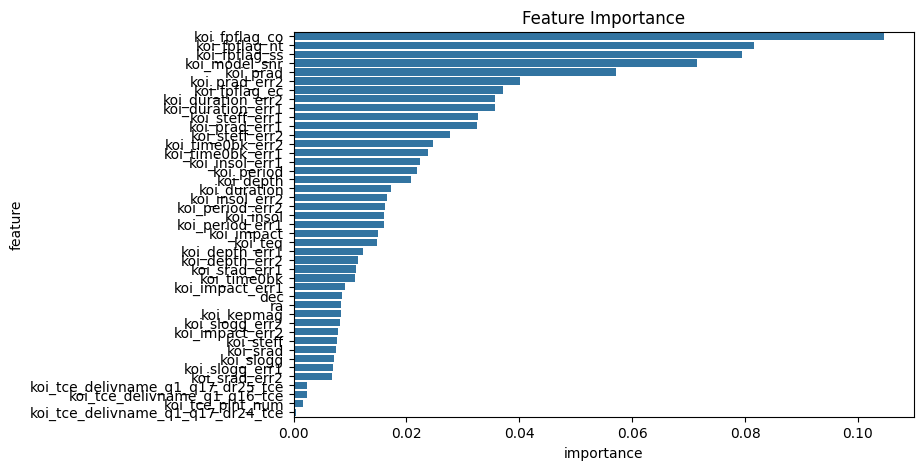

Feature importances (highest to lowest):
koi_fpflag_co: 0.1047
koi_fpflag_nt: 0.0815
koi_fpflag_ss: 0.0794
koi_model_snr: 0.0715
koi_prad: 0.0571
koi_prad_err2: 0.0402
koi_fpflag_ec: 0.0371
koi_duration_err2: 0.0357
koi_duration_err1: 0.0356
koi_steff_err1: 0.0326
koi_prad_err1: 0.0324
koi_steff_err2: 0.0278
koi_time0bk_err2: 0.0246
koi_time0bk_err1: 0.0238
koi_insol_err1: 0.0224
koi_period: 0.0218
koi_depth: 0.0207
koi_duration: 0.0172
koi_insol_err2: 0.0166
koi_period_err2: 0.0161
koi_insol: 0.0161
koi_period_err1: 0.0160
koi_impact: 0.0150
koi_teq: 0.0148
koi_depth_err1: 0.0122
koi_depth_err2: 0.0114
koi_srad_err1: 0.0111
koi_time0bk: 0.0109
koi_impact_err1: 0.0091
dec: 0.0086
ra: 0.0084
koi_kepmag: 0.0084
koi_slogg_err2: 0.0082
koi_impact_err2: 0.0078
koi_steff: 0.0077
koi_srad: 0.0075
koi_slogg: 0.0071
koi_slogg_err1: 0.0069
koi_srad_err2: 0.0068
koi_tce_delivname_q1_q17_dr25_tce: 0.0025
koi_tce_delivname_q1_q16_tce: 0.0024
koi_tce_plnt_num: 0.0017
koi_tce_delivname_q1_q17_dr24_tc

In [ ]:
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

print("Feature importances (highest to lowest):")
for i, row in feature_importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


In [ ]:
clf_final = RandomForestClassifier(
    n_estimators=2000,
    max_depth=best_params['max_depth'],
    random_state=42
)

clf_final.fit(X_train, y_train)

y_test_pred = clf_final.predict(X_test)


print("Final Test Set Classification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

# Plot the confusion matrix for the test set results
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Set')
plt.show()

NameError: name 'RandomForestClassifier' is not defined